## Data Distribution

First of all, we import all the libraries we need and load the data and visualize it.

In [1]:
%load_ext autoreload
%autoreload 2

# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from os import path
import utils

# set the style of the plots
seaborn.set_theme(style="whitegrid") 
# load the data from the csv files
datasetname = path.join('..', 'dataset', 'cyclists.csv')
cyclists = pd.read_csv(datasetname)
datasetname = path.join('..', 'dataset', 'races.csv')
races = pd.read_csv(datasetname)

In this notebook, we will analyze the distribution of the data in the dataset from $dataset/cyclists.csv$ and $dataset/races.csv$. The two dataset contain respectively informations about the cyclists and the races made by the cyclists over the years. The analysis of the dataset is as follows:
- We plot the distribution of the attributes of the cyclists and the races as they are in order to see the shape of the distribution.
- We identify the outliers in the current datasets in order to remove them.
- We analyze the correlation between the attributes of the cyclists and the races after we fixed the attributes with missing points.

### Distribution of the cyclusts' dataset

First of all, we analyze the cyclists' data. The dataset presents itself as follows:

In [2]:
cyclists.head()

,_url,name,birth_year,weight,height,nationality
0,bruno-surra,Bruno Surra,1964.0,NaN,NaN,Italy
1,gerard-rue,Gérard Rué,1965.0,74.0,182.0,France
2,jan-maas,Jan Maas,1996.0,69.0,189.0,Netherlands
3,nathan-van-hooydonck,Nathan Van Hooydonck,1995.0,78.0,192.0,Belgium
4,jose-felix-parra,José Félix Parra,1997.0,55.0,171.0,Spain


In [3]:
cyclists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


We start the analysis by looking at distribution of the following columns made up of numerical values:
- $birth\_year$:    float64
- $weight$:         float64
- $height$:        float64

In [4]:
cyclists.select_dtypes(include=['number']).head()

,birth_year,weight,height
0,1964.0,NaN,NaN
1,1965.0,74.0,182.0
2,1996.0,69.0,189.0
3,1995.0,78.0,192.0
4,1997.0,55.0,171.0


As we said before, we will plot the distribution of the data in order to see the shape of the distribution of this attributes.

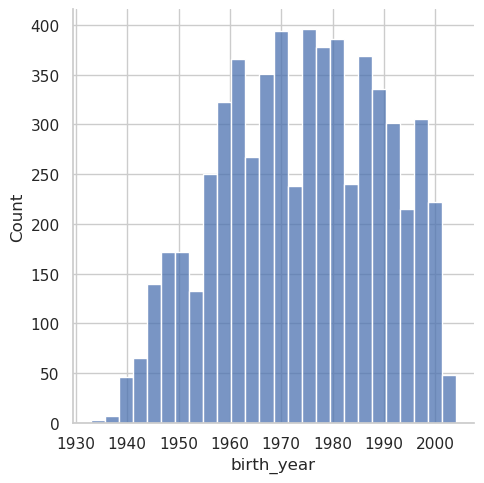

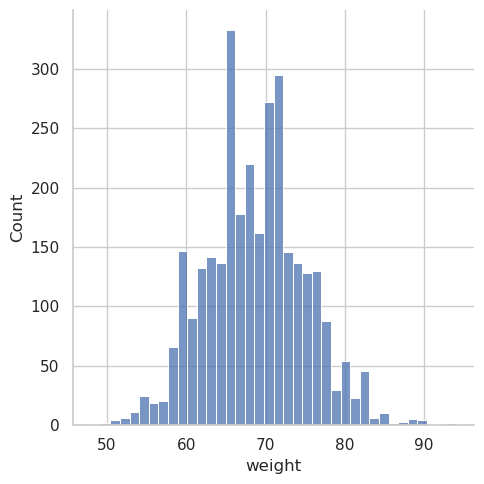

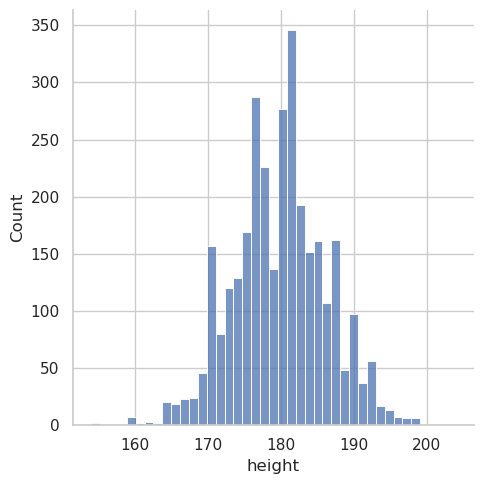

In [5]:

for feature in cyclists.select_dtypes(include="number").columns:
    seaborn.displot(cyclists,x=feature)

By looking at the distribution, we notice that distribution of the weight and height of the cyclists have a similar shape of the data distribution. 

For a better understanding, we will analyse the correlation between the weight and height of the cyclists once the dataset is prepared.

Now we will analyze the distribution of the cycylists over the different countries. We will analyze the distribution of the following column which contain the name of the nation of each the cyclists. We will plot the frequency of the cyclists for each nation.
- $nationality$:   object

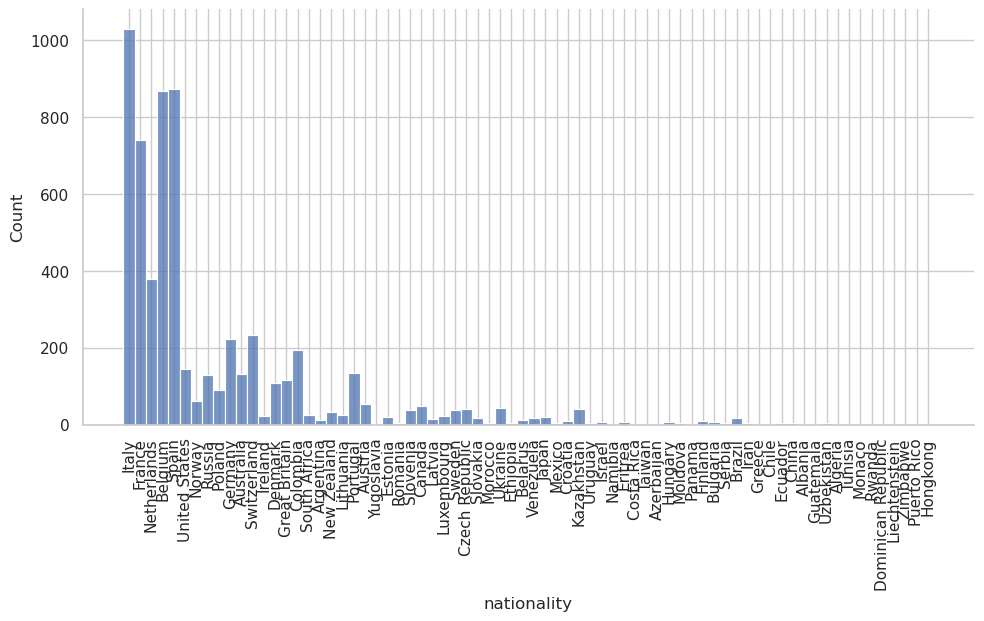

In [6]:
g = seaborn.displot(cyclists, x = "nationality",
                    kind="hist",
                    row_order="desc",
                    bins=cyclists["nationality"].unique().size,
                    aspect=2,
                    )
g.set_xticklabels(rotation=90)

Now we analyze the distribution of the cyclists' numerical attributes with a boxplot. We will analyze the distribution of the following columns made up of numerical values:
- $wight$:    float64
- $height$:   float64
- $birth\_year$: float64

For each one of this we will analyze the distribution and see if there are outliers.

Outliers in weight:
      weight
292     91.0
348     88.0
679     88.0
857     89.0
1375    48.0
1487    90.0
2720    50.0
3007    90.0
3902    87.0
4110    87.0
4308    90.0
4554    93.0
4690    88.0
5015    90.0
5066    89.0
5490    92.0
5726    50.0
5758    87.0
5913    94.0


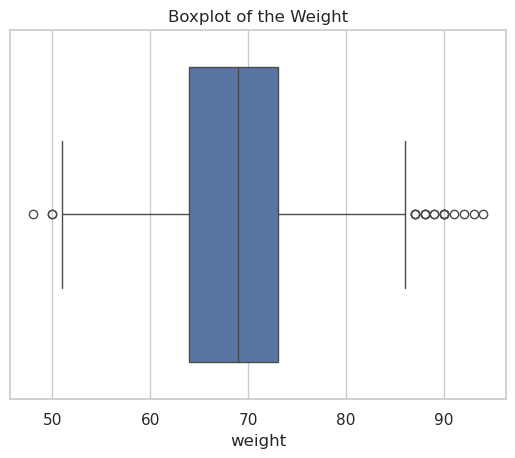

Outliers in height:
      height
292    198.0
522    199.0
679    204.0
720    154.0
840    159.0
845    198.0
954    160.0
969    159.0
1579   161.0
1818   155.0
2437   160.0
2471   198.0
2720   158.0
3007   199.0
3101   198.0
3152   160.0
3956   202.0
3994   157.0
4043   161.0
4879   160.0
4973   159.0
5920   200.0


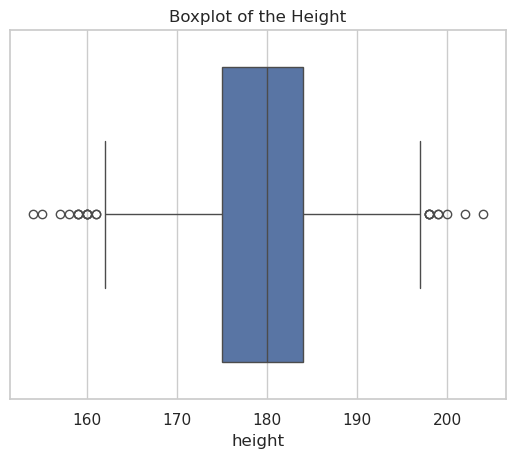

Outliers in birth_year:
Empty DataFrame
Columns: [birth_year]
Index: []


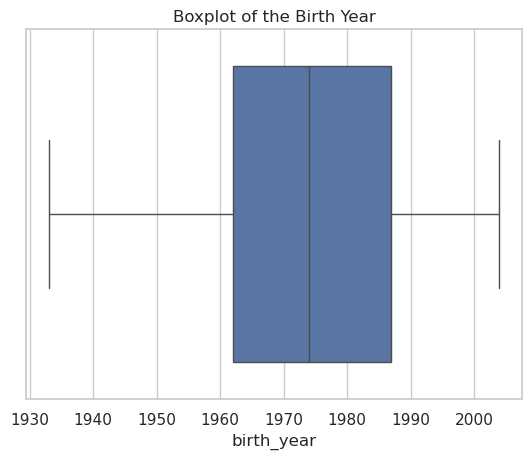

In [7]:
weight_outliers = utils.find_outliers(cyclists, "weight")
print("Outliers in weight:")
print(weight_outliers)

seaborn.boxplot(x="weight", data=cyclists)
plt.title("Boxplot of the Weight")
plt.show()

height_outliers = utils.find_outliers(cyclists, "height")
print("Outliers in height:")
print(height_outliers)

seaborn.boxplot(x="height", data=cyclists)
plt.title("Boxplot of the Height")
plt.show()


birth_year_outliers = utils.find_outliers(cyclists, "birth_year")
print("Outliers in birth_year:")
print(birth_year_outliers)

seaborn.boxplot(x="birth_year", data=cyclists)
plt.title("Boxplot of the Birth Year")
plt.show()


As we can see there are some outliers in the $weight$ and $height$ columns as depicted in the graph. We will remove the outliers from the dataset and analyze the distribution of the cyclists again.

Thanks to the work done in the $cyclist\_analysis.ipynb$ notebook, we filled the missing values and removed the outliers from the dataset. We will now analyze the distribution of the cyclists' attributes again.

In [8]:
datasetname = path.join('..', 'dataset', 'cyclists_cleaned.csv')
cyclists = pd.read_csv(datasetname)

We analyze again the distribution of the cyclists' numerical attributes.

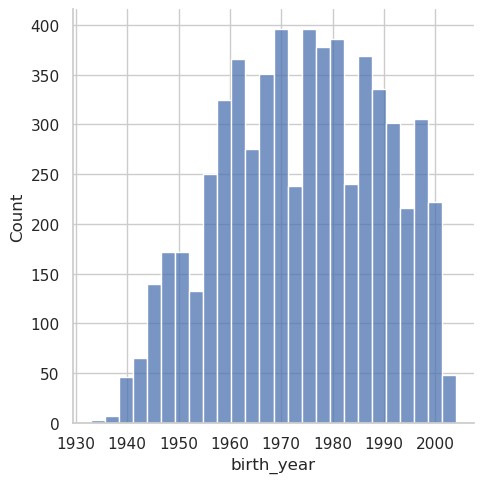

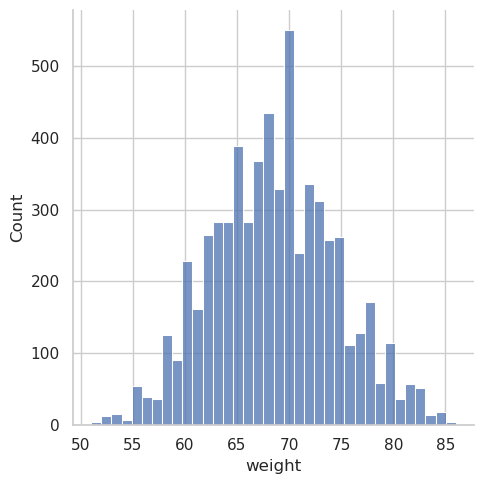

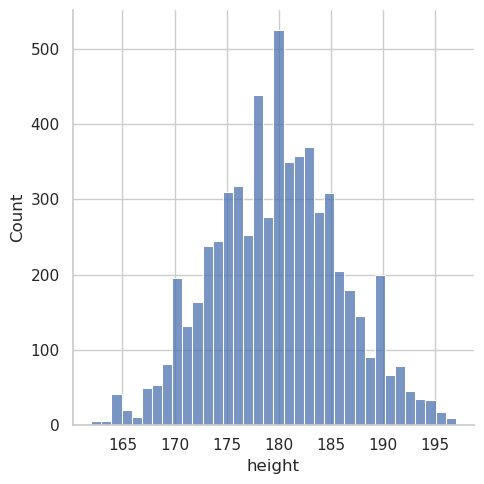

In [9]:
for feature in cyclists.select_dtypes(include="number").columns:
    seaborn.displot(cyclists,x=feature)

Now we look at the correlation between the numerical attributes of the cyclists by using a scatter plot.

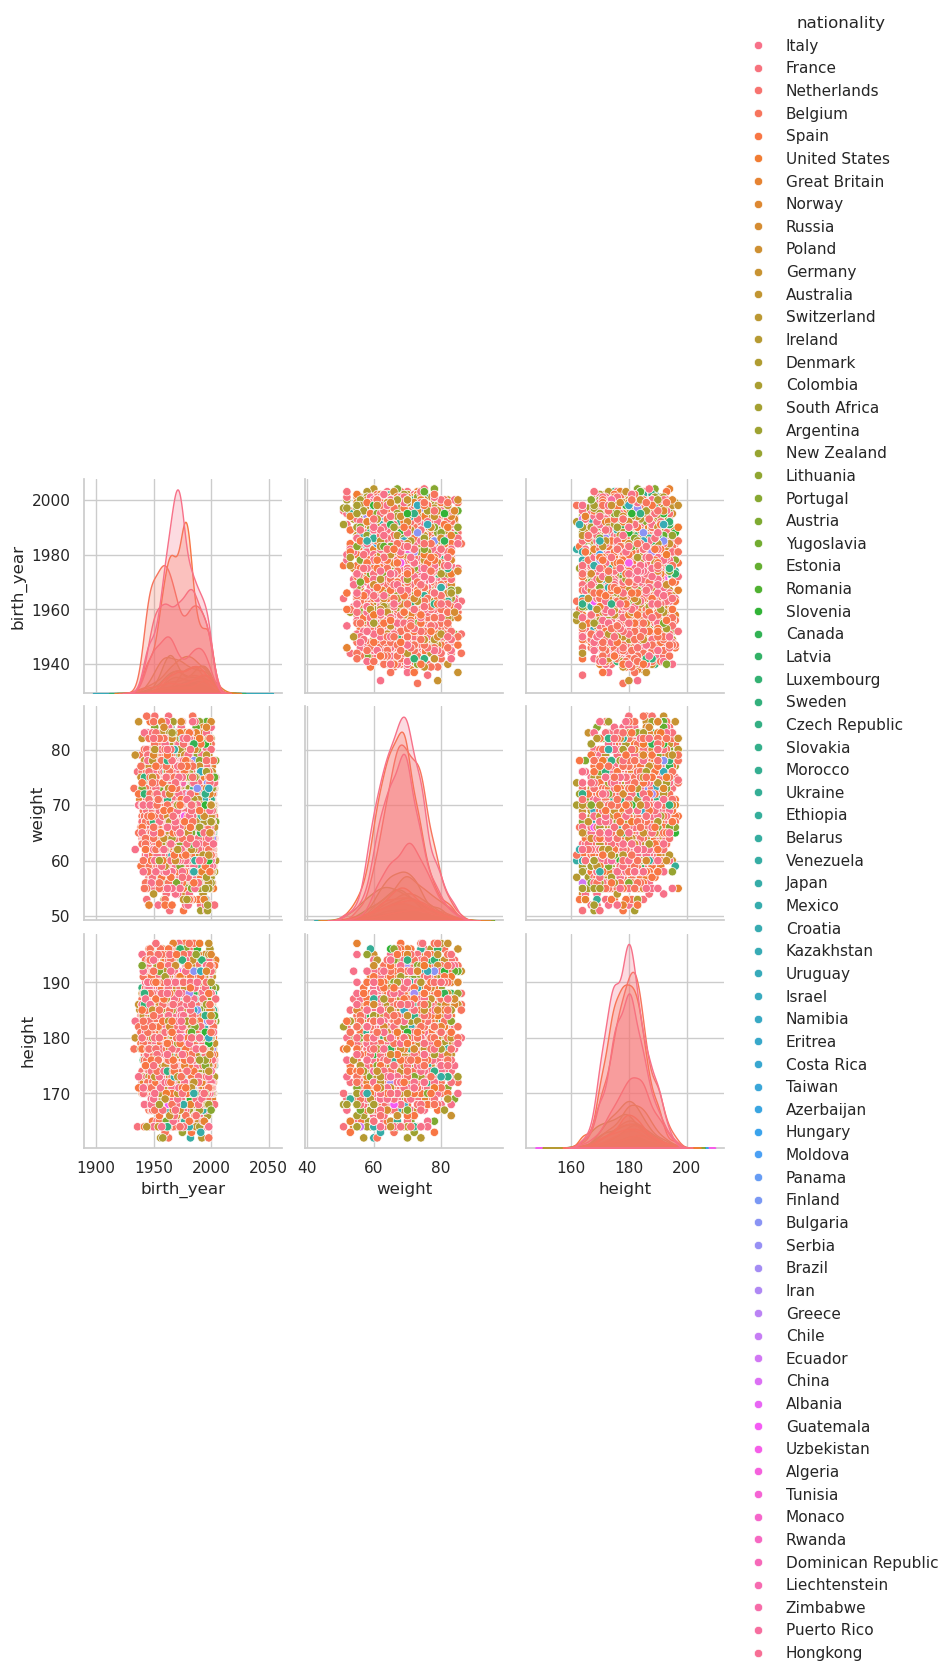

In [10]:
seaborn.pairplot(cyclists, hue="nationality", vars=["birth_year", "weight", "height"])
plt.show()

For a deeper understanding we will analyze the correlation between the numerical attributes also by using a heatmap.

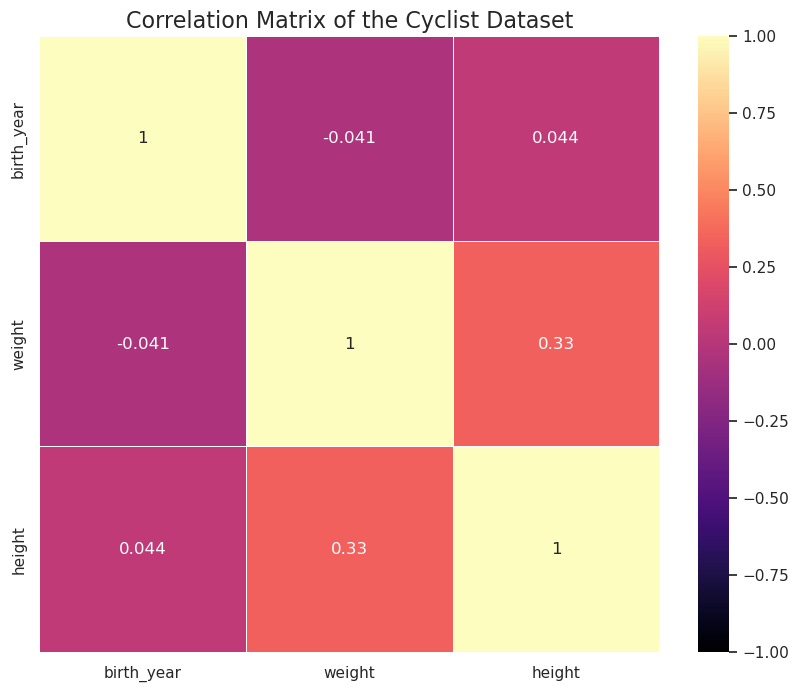

In [11]:
cyclist_correlations = cyclists[['birth_year', 'weight', 'height']].corr()

plt.figure(figsize=(10, 8)) 
seaborn.heatmap(cyclist_correlations, annot=True, cmap='magma', vmin=-1, vmax=1, linewidths=0.5)


plt.title("Correlation Matrix of the Cyclist Dataset", fontsize=16)


plt.show()

### Distribution of the data of the races

Now we analyze the races dataset's distributions. The dataset presents itself as follows:

In [12]:
races.head()

,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,date,position,cyclist,cyclist_age,is_tarmac,is_cobbled,is_gravel,cyclist_team,delta
0,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,0,sean-kelly,22.0,True,False,False,vini-ricordi-pinarello-sidermec-1986,0.0
1,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,1,gerrie-knetemann,27.0,True,False,False,norway-1987,0.0
2,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,2,rene-bittinger,24.0,True,False,False,NaN,0.0
3,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,3,joseph-bruyere,30.0,True,False,False,navigare-blue-storm-1993,0.0
4,tour-de-france/1978/stage-6,Tour de France,100.0,NaN,162000.0,1101.0,1.0,1241,NaN,1978-07-05 04:02:24,4,sven-ake-nilsson,27.0,True,False,False,spain-1991,0.0


In [13]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   _url                 589865 non-null  object 
 1   name                 589865 non-null  object 
 2   points               589388 non-null  float64
 3   uci_points           251086 non-null  float64
 4   length               589865 non-null  float64
 5   climb_total          442820 non-null  float64
 6   profile              441671 non-null  float64
 7   startlist_quality    589865 non-null  int64  
 8   average_temperature  29933 non-null   float64
 9   date                 589865 non-null  object 
 10  position             589865 non-null  int64  
 11  cyclist              589865 non-null  object 
 12  cyclist_age          589752 non-null  float64
 13  is_tarmac            589865 non-null  bool   
 14  is_cobbled           589865 non-null  bool   
 15  is_gravel        

First of all, we analyze the distribution of the values related to the competitions. To do so we will analyze the distribution of the following columns made up of numerical values after aggregating the data by the values of $\_url$ column. After we aggregate the data, the new dataset $grouped\_races$ will contain the following columns:
-   $\_url$ :  object 
-   $name$:  object 
-   $points$:  float64
-   $uci\_points$:  float64
-   $length$:  float64
-   $climb\_total$:  float64
-   $profile$:  float64
-   $startlist\_quality$:  int64  
-   $average\_temperature$:  float64
-   $is\_tarmac$:  bool
-   $is\_cobbled$:  bool
-   $is\_gravel$:  bool



In [14]:
def most_frequent(series):
    return series.mode()[0] if not series.mode().empty else series.iloc[0]

grouped_races = races.groupby('_url').agg({
    'name': most_frequent,               
    'points': most_frequent,              
    'uci_points': most_frequent,          
    'length': 'mean',           
    'climb_total': 'mean',     
    'profile': most_frequent,            
    'startlist_quality': 'mean',   
    'average_temperature': 'mean',
    'is_tarmac': most_frequent,
    'is_cobbled': most_frequent,
    'is_gravel': most_frequent,
}).reset_index()

grouped_races.head()


,_url,name,points,uci_points,length,climb_total,profile,startlist_quality,average_temperature,is_tarmac,is_cobbled,is_gravel
0,amstel-gold-race/1970/result,Amstel Gold Race,225.0,NaN,240000.0,NaN,NaN,372.0,NaN,False,False,False
1,amstel-gold-race/1971/result,Amstel Gold Race,225.0,NaN,233000.0,NaN,NaN,523.0,NaN,False,False,False
2,amstel-gold-race/1972/result,Amstel Gold Race,225.0,NaN,237000.0,NaN,NaN,339.0,NaN,False,False,False
3,amstel-gold-race/1973/result,Amstel Gold Race,225.0,NaN,238000.0,NaN,NaN,441.0,NaN,False,False,False
4,amstel-gold-race/1974/result,Amstel Gold Race,225.0,NaN,238000.0,NaN,NaN,389.0,NaN,False,False,False


Now we plot the distribution of the data in order to see the shape of the distribution of the numerical attributes.

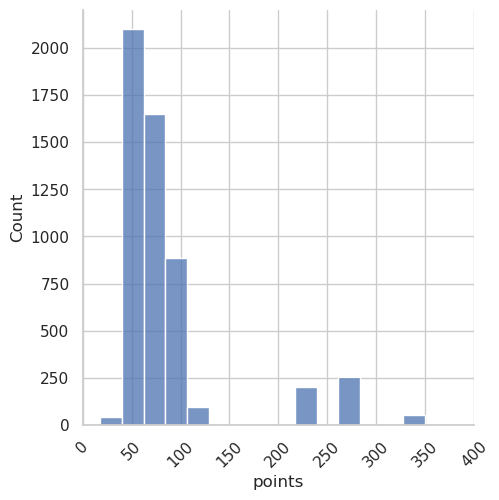

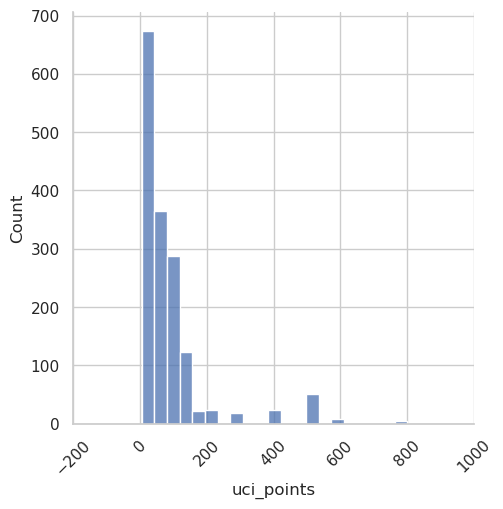

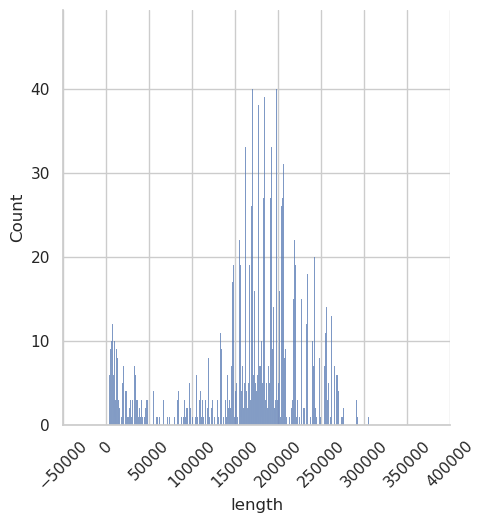

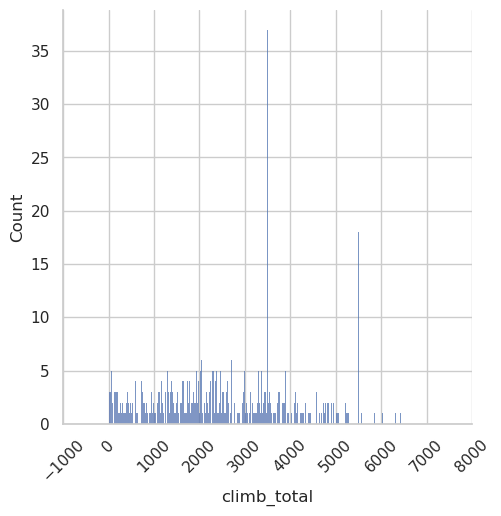

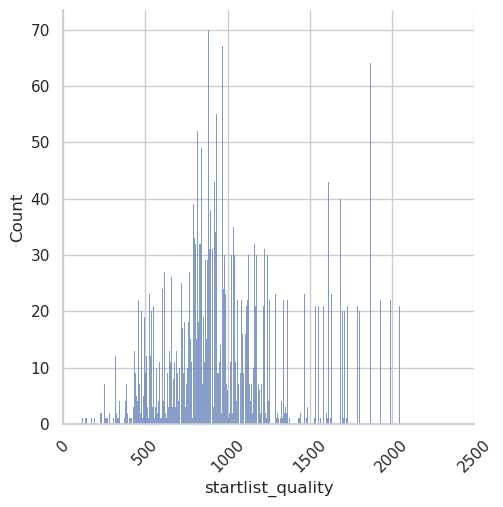

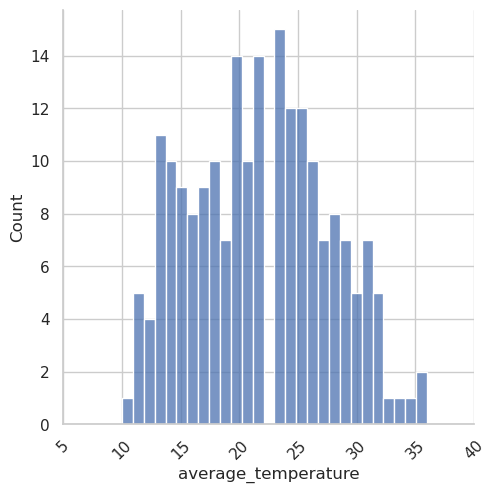

In [15]:
for feature in ["points","uci_points", "length", "climb_total", "startlist_quality", "average_temperature"]:
    g = seaborn.displot(grouped_races, x = feature,
                        kind="hist",
                        row_order="desc",
                        bins=grouped_races[feature].unique().size,
                        )
    g.set_xticklabels(rotation=45)

Since there is a lot of variance in $length$, $climb\_total$ and $startlist\_quality$, we analyze the distribution of these columns again after we aggreggate the values by the year derived from the $\_url$ attribute (e.g. all the $\_url$ that start with $tour-de-france/1978$ will be aggregated in a single entry of the new table).

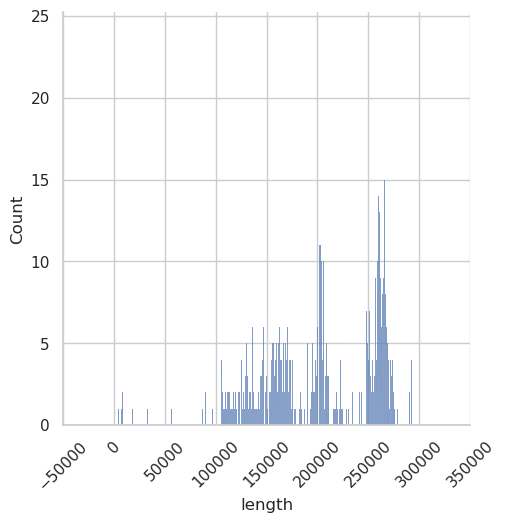

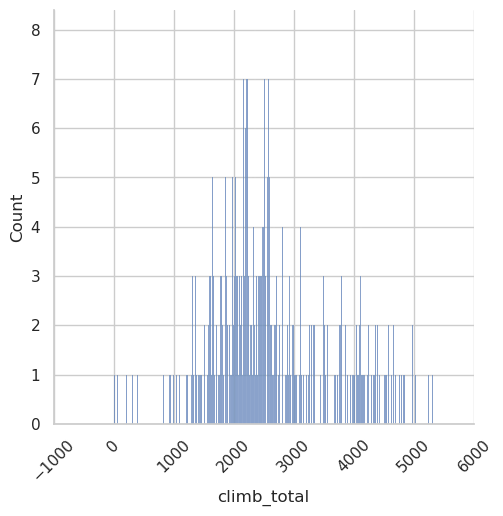

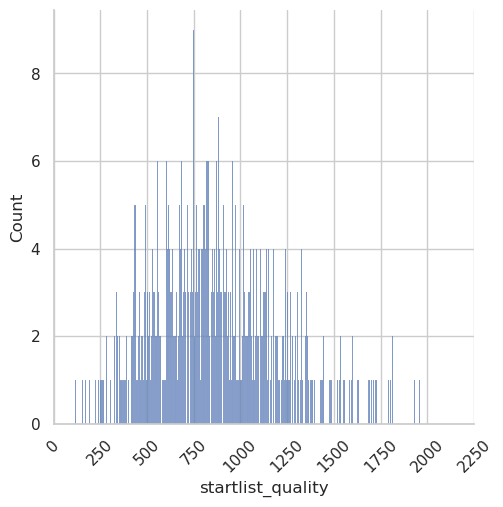

In [16]:
races_bydate = races.copy()
races_bydate['_url'] = races_bydate['_url'].apply(lambda x: '/'.join(x.split('/')[:2]))

races_bydate = races_bydate.groupby('_url').agg({      
    'length': 'mean',           
    'climb_total': 'mean',             
    'startlist_quality': 'mean',   
}).reset_index()

for feature in ["length", "climb_total", "startlist_quality"]:
    g = seaborn.displot(races_bydate, x = feature,
                        kind="hist",
                        row_order="desc",
                        bins=races_bydate[feature].unique().size,
                        )
    g.set_xticklabels(rotation=45)


We noticed that $climb\_total$, $profile$ and $uci\_points$ have some missing values. We will fill the missing values with the mean of the column. We will analyze the distribution again after filling the missing values.

Now we analyze the distribution of the profile values.

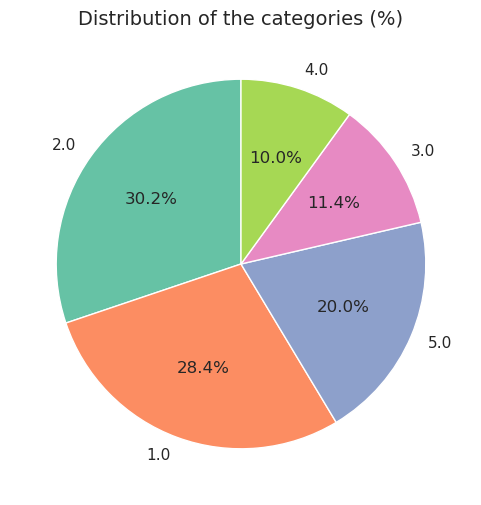

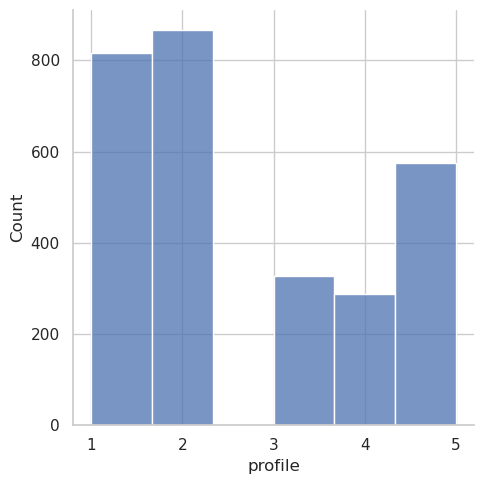

In [17]:
category_counts = grouped_races["profile"].value_counts()

category_percentages = category_counts / category_counts.sum() * 100

plt.figure(figsize=(6, 6)) 
plt.pie(category_percentages, 
        labels=category_percentages.index,  
        autopct='%1.1f%%', 
        colors=seaborn.color_palette("Set2"), 
        startangle=90, 
        ) 

plt.title("Distribution of the categories (%)", fontsize=14)

plt.show()

g = seaborn.displot(grouped_races, x = "profile",
                        kind="hist",
                        row_order="desc",
                        bins=grouped_races["profile"].unique().size,
                        )

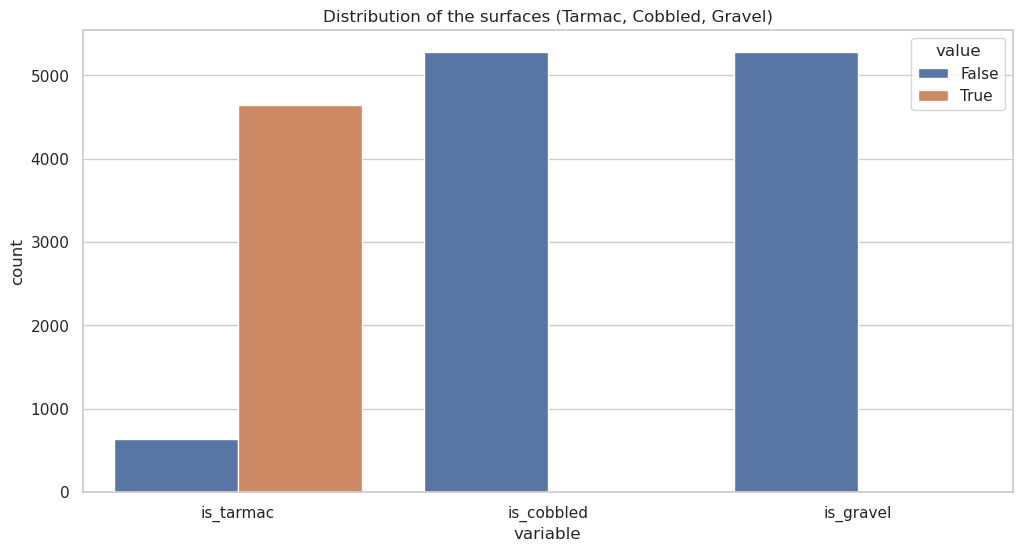

In [18]:
plt.figure(figsize=(12, 6))
seaborn.countplot(data=grouped_races.melt(value_vars=['is_tarmac', 'is_cobbled', 'is_gravel']), 
              x='variable', hue='value')
plt.title('Distribution of the surfaces (Tarmac, Cobbled, Gravel)')
plt.show()

As we can see the most common surface type is tarmac, while the other two types (cobbled and gravel) are always set false in the entire dataset.

Here we visualize the distribution of the cyclists over the different comptitions.

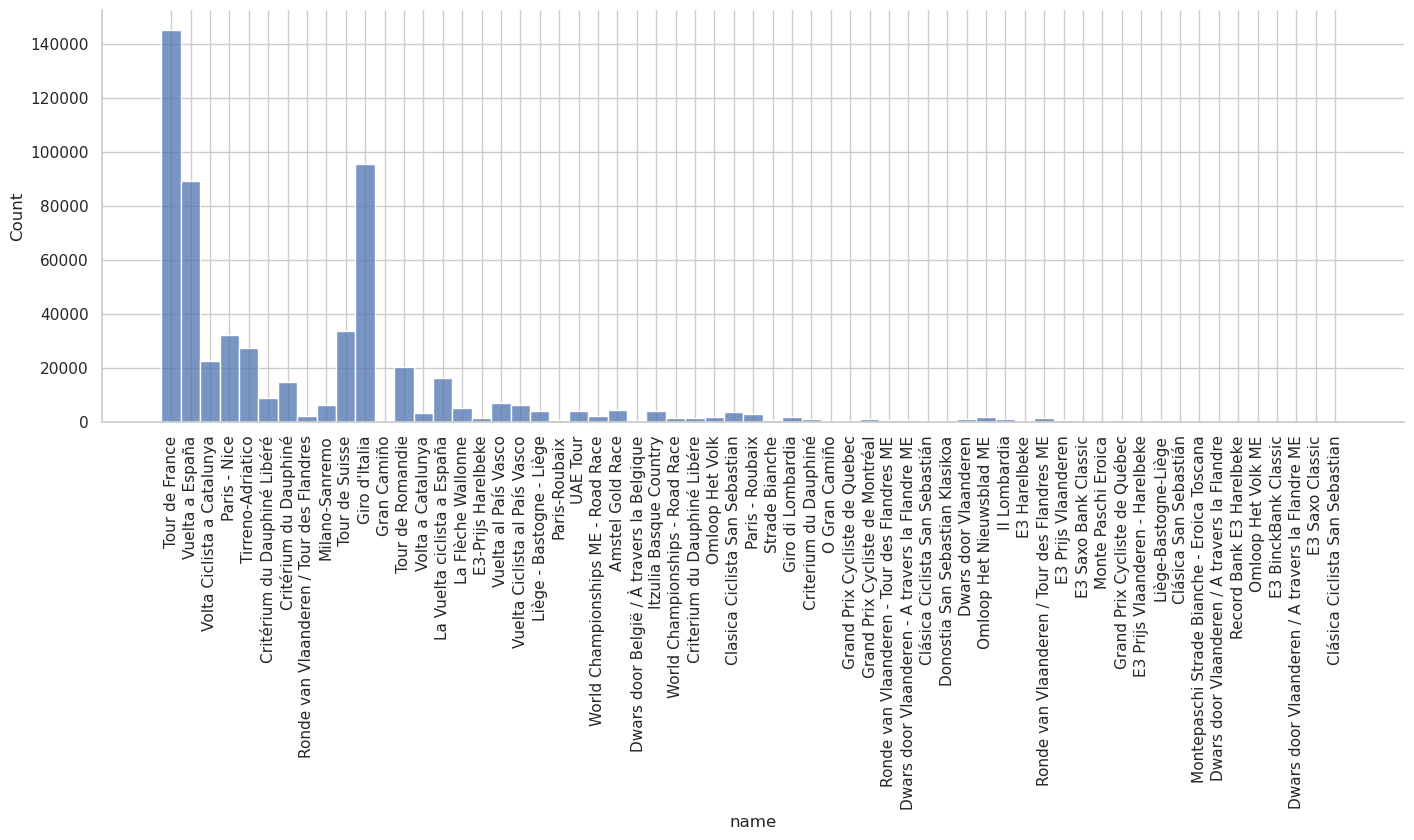

In [19]:
g = seaborn.displot(races, x = "name",
                    kind="hist",
                    row_order="desc",
                    bins=races["name"].unique().size,
                    aspect=3,
                    )
g.set_xticklabels(rotation=90)

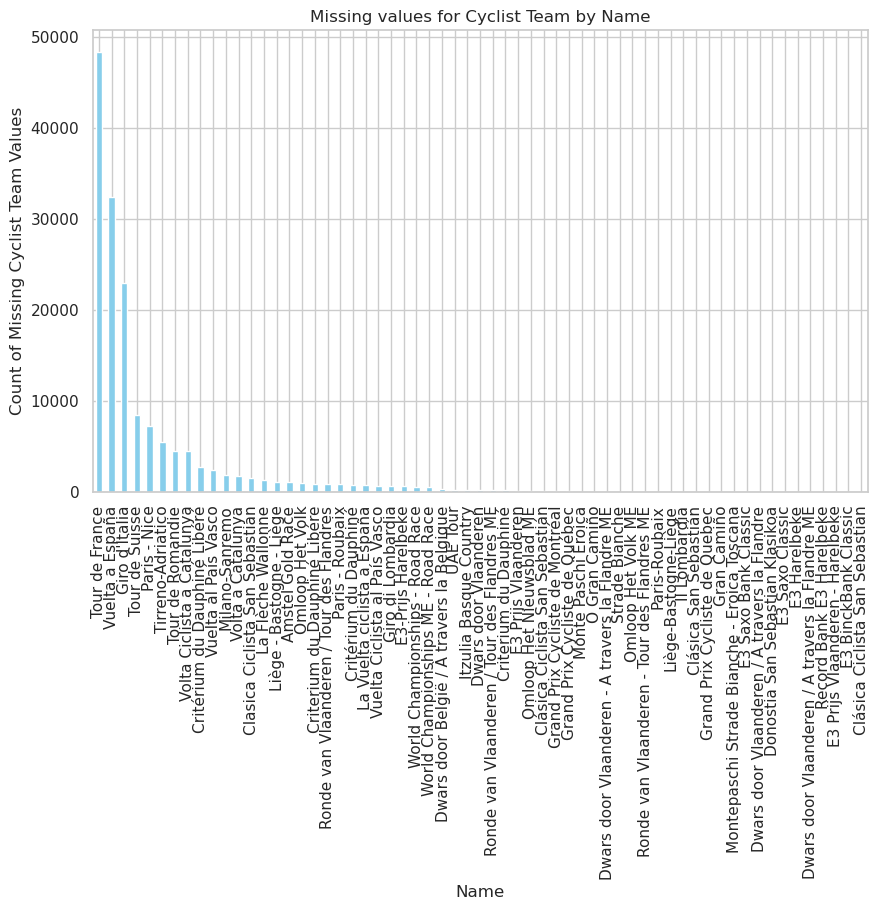

In [20]:
# missing values in cyclist team for each competition

missing_values = races[['name', 'cyclist_team']].isnull()

missing_by_name = missing_values.groupby(races['name'])['cyclist_team'].sum()

missing_by_name = missing_by_name[missing_by_name > 0]

missing_by_name = missing_by_name.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing_by_name.plot(kind='bar', color='skyblue')
plt.title('Missing values for Cyclist Team by Name')
plt.xlabel('Name')
plt.ylabel('Count of Missing Cyclist Team Values')
plt.xticks(rotation=90)
plt.show()


Here we analyze the distribution of the cyclists over the differnet teams

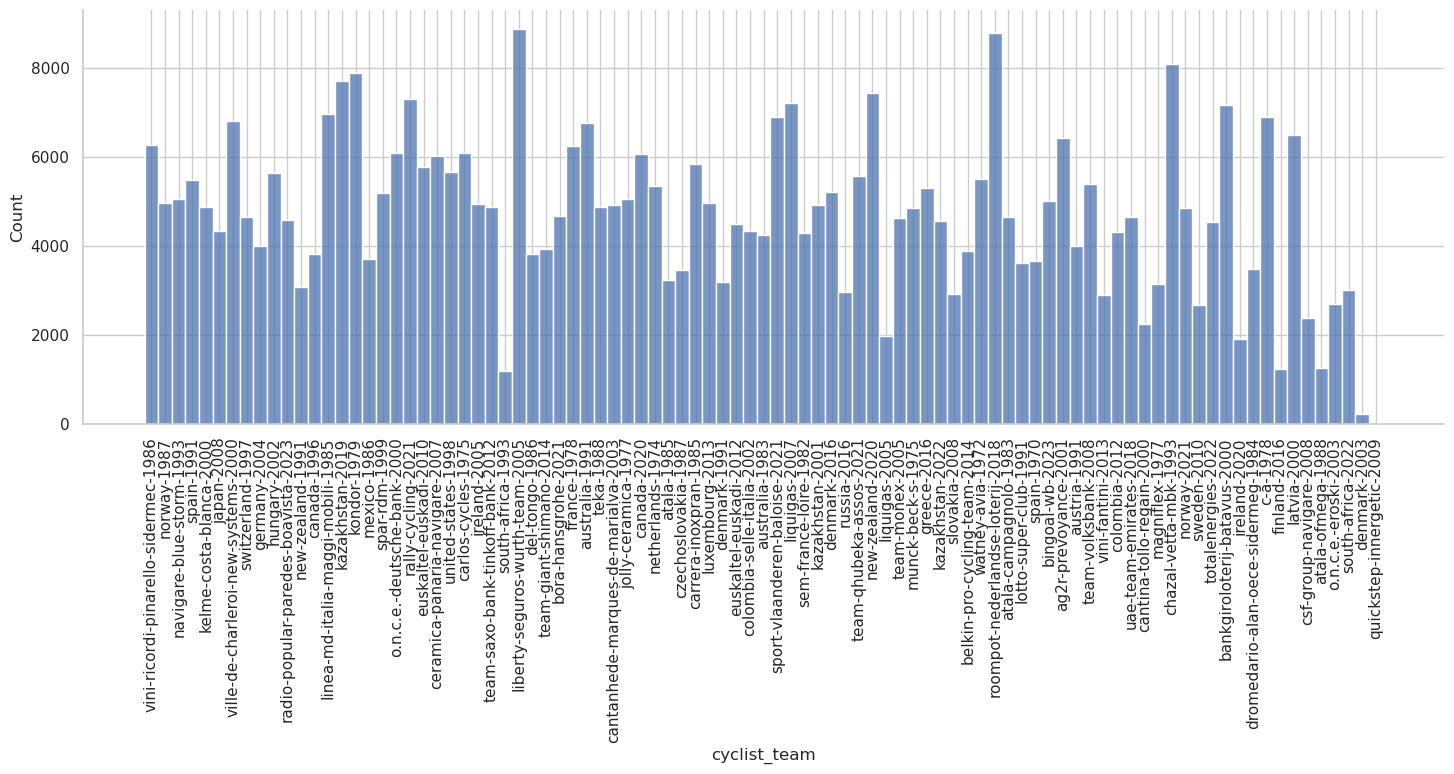

In [21]:
g = seaborn.displot(races, x = "cyclist_team",
                    kind="hist",
                    row_order="desc",
                    bins=races["cyclist_team"].unique().size,
                    aspect=3,
                    )
g.set_xticklabels(rotation=90)

Here we plot the distribution of the partecipants over the years.

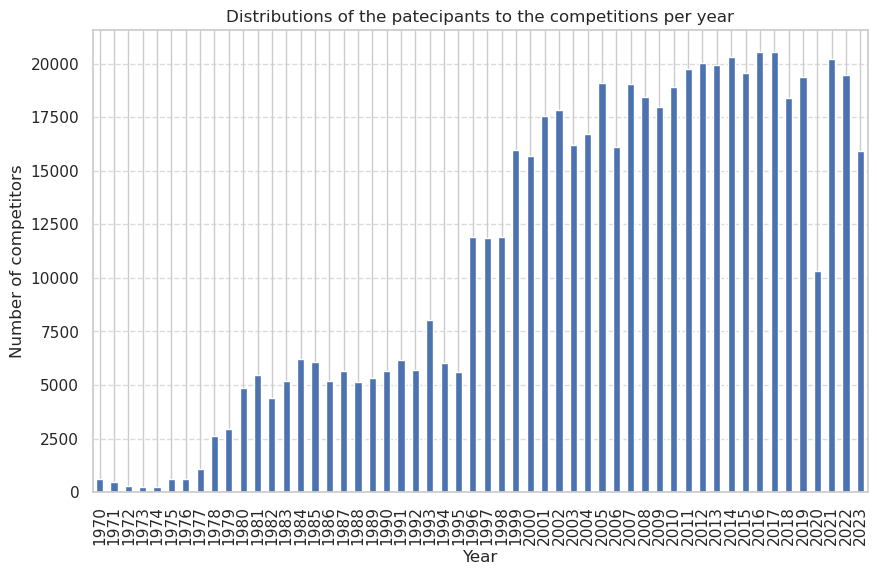

In [22]:
races['date'] = pd.to_datetime(races['date'])
races['year'] = races['date'].dt.year

races_per_year = races['year'].value_counts().sort_index()


races.drop(columns=['year'], inplace=True)

plt.figure(figsize=(10, 6))
races_per_year.plot(kind='bar')

plt.title('Distributions of the patecipants to the competitions per year')
plt.xlabel('Year')
plt.ylabel('Number of competitors')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Now do a boxplot of the numerical attributes of the dataset to see if ther are outliers and eventually identify them.

Outliers in points:
        points
1269     275.0
1270     275.0
1271     275.0
1272     275.0
1273     275.0
...        ...
589458   275.0
589459   275.0
589460   275.0
589461   275.0
589462   275.0

[45752 rows x 1 columns]


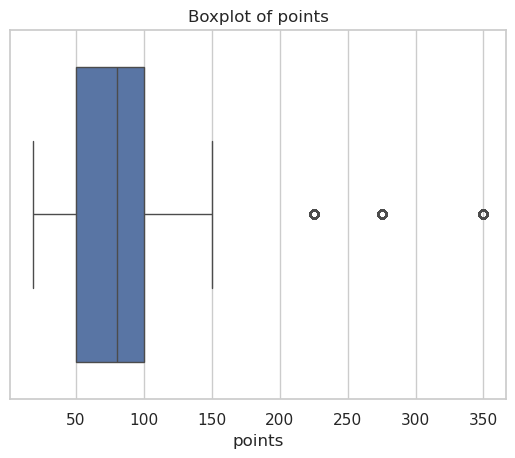

Outliers in uci_points:
        uci_points
8318         500.0
8319         500.0
8320         500.0
8321         500.0
8322         500.0
...            ...
588245       400.0
588246       400.0
588247       400.0
588248       400.0
588249       400.0

[12022 rows x 1 columns]


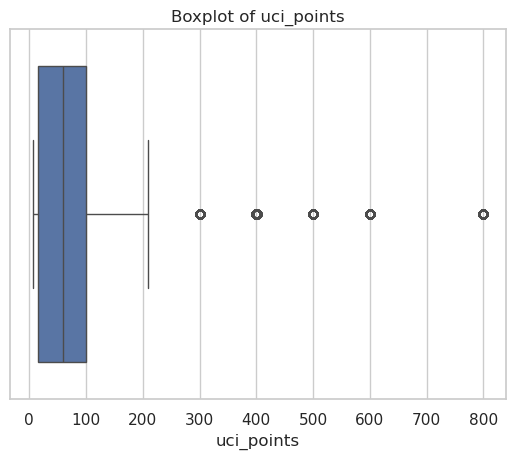

Outliers in length:
        length
426     8100.0
427     8100.0
428     8100.0
429     8100.0
430     8100.0
...        ...
589860  8400.0
589861  8400.0
589862  8400.0
589863  8400.0
589864  8400.0

[81960 rows x 1 columns]


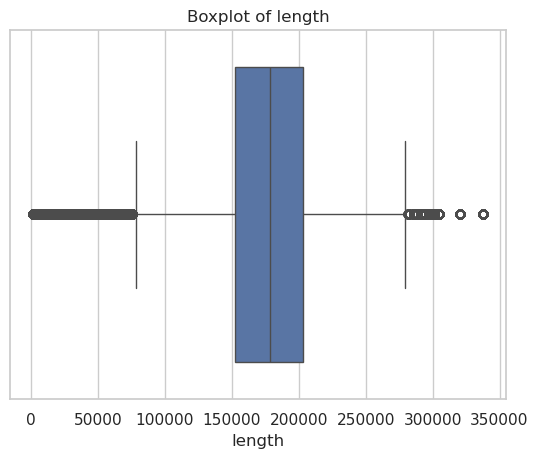

Outliers in climb_total:
        climb_total
56822        6939.0
56823        6939.0
56824        6939.0
56825        6939.0
56826        6939.0
...             ...
554153       6317.0
554154       6317.0
554155       6317.0
554156       6317.0
554157       6317.0

[747 rows x 1 columns]


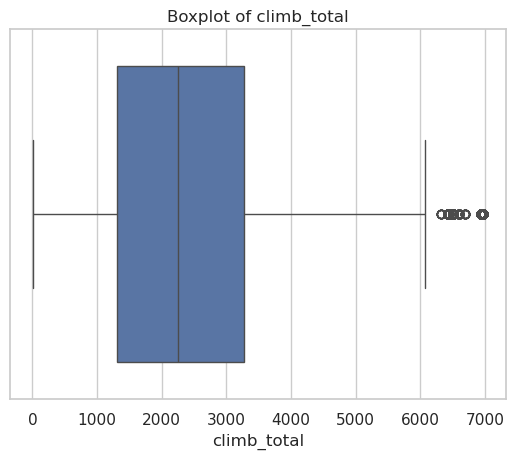

Outliers in profile:
Empty DataFrame
Columns: [profile]
Index: []


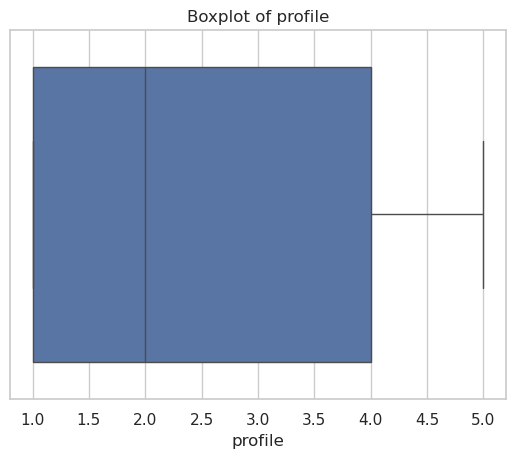

Outliers in startlist_quality:
        startlist_quality
10754                2047
10755                2047
10756                2047
10757                2047
10758                2047
...                   ...
566103               2047
566104               2047
566105               2047
566106               2047
566107               2047

[3512 rows x 1 columns]


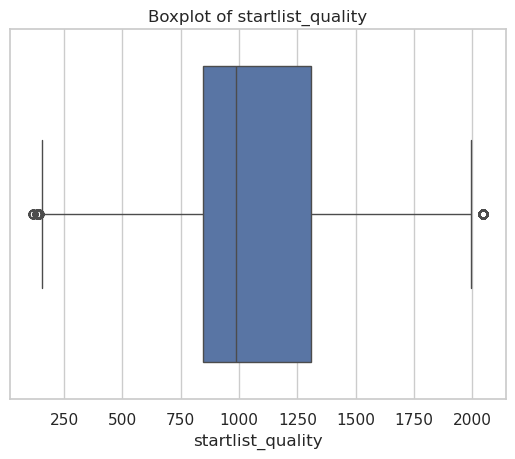

Outliers in average_temperature:
Empty DataFrame
Columns: [average_temperature]
Index: []


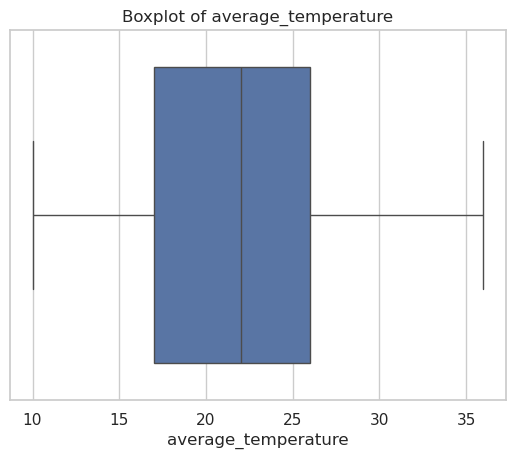

Outliers in position:
Empty DataFrame
Columns: [position]
Index: []


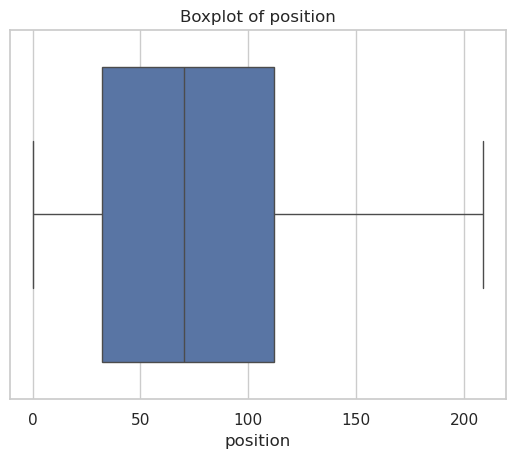

Outliers in cyclist_age:
        cyclist_age
111            39.0
129            39.0
241            39.0
287            39.0
359            39.0
...             ...
589598         39.0
589617         39.0
589746         39.0
589764         41.0
589823         39.0

[4247 rows x 1 columns]


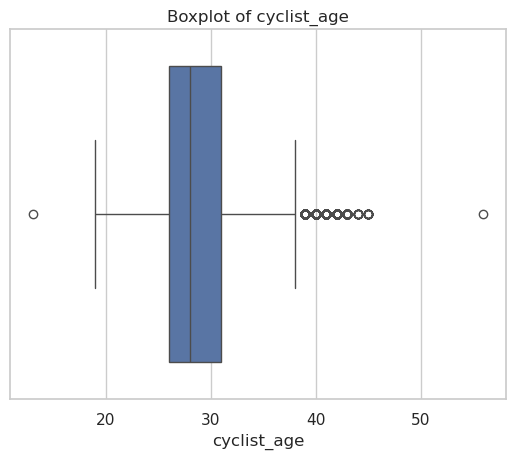

Outliers in delta:
         delta
178     1620.0
179     1620.0
180     1620.0
181     1620.0
182     1620.0
...        ...
589197  1954.0
589198  1954.0
589199  1954.0
589200  1954.0
589201  1954.0

[33234 rows x 1 columns]


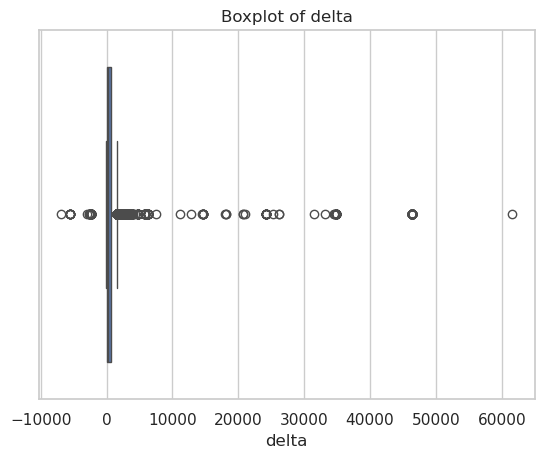

In [23]:
for feature in races.select_dtypes(include="number").columns:
    feature_outliers = utils.find_outliers(races, feature)
    print(f"Outliers in {feature}:")
    print(feature_outliers)    
    seaborn.boxplot(races,x=feature)
    plt.title("Boxplot of "+feature)
    plt.show()

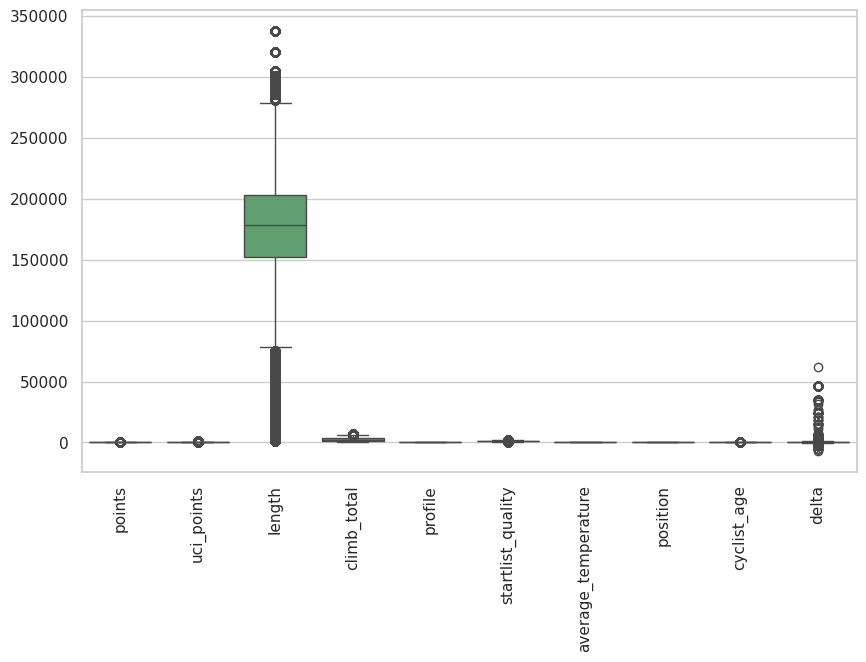

In [24]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=races.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

As we can see the following attributes present some outliers:
- $points$
- $uci\_points$
- $length$
- $climb\_total$
- $startlist\_quality$
- $cyclist\_age$
- $delta$

We will remove the outliers from the dataset and analyze the distribution of the races again.

## Missing values of climb_total and profile.

First we group the rows of the dataframe by the profile. Fo each profile we calculate the mean of the climb_total and we fill the missing values of climb_total with the mean climb_total. 

1. We fill the missing values of $climb\_total$ with the mean of $climb\_total$.
2. We calculate the mean of $climb\_total$ after grouping the the rows by $profile$.
3. We fill the missing values of $profile$ with the value of $profile$ associated to the nearest value of $climb_total$.

We fill the missing values of profile with value of profile associated to the nearest nearest value of climb_total.

In [27]:
df_for_imputation = races[['climb_total', 'profile']].copy()

# fill the missing values of the climb_total column with the mean value of the column.
imputer_climb = SimpleImputer(strategy='mean') 
df_for_imputation['climb_total'] = imputer_climb.fit_transform(df_for_imputation[['climb_total']])

profile_mean_climb_total = df_for_imputation.groupby('profile')['climb_total'].mean()

reference_df = profile_mean_climb_total.reset_index()
reference_df.columns = ['profile', 'mean_climb_total']

# fill the missing values of the profile column with the closest profile based on the climb_total column.
def fill_profile_with_closest(row):
    if pd.isna(row['profile']):
        closest_profile = reference_df.iloc[(reference_df['mean_climb_total'] - row['climb_total']).abs().argsort()[:1]]  
        return closest_profile['profile'].values[0]
    return row['profile']

df_for_imputation['profile'] = df_for_imputation.apply(fill_profile_with_closest, axis=1)

# assign the imputed values back to the original dataframe
races[['climb_total', 'profile']] = df_for_imputation

print("NaN after the imputation:")
print(races[['climb_total', 'profile']].isnull().sum())

NaN dopo l'imputazione finale:
climb_total    0
profile        0
dtype: int64


Now after filling the missing values of $climb\_total$ and $profile$ of the correlation after filling the values.

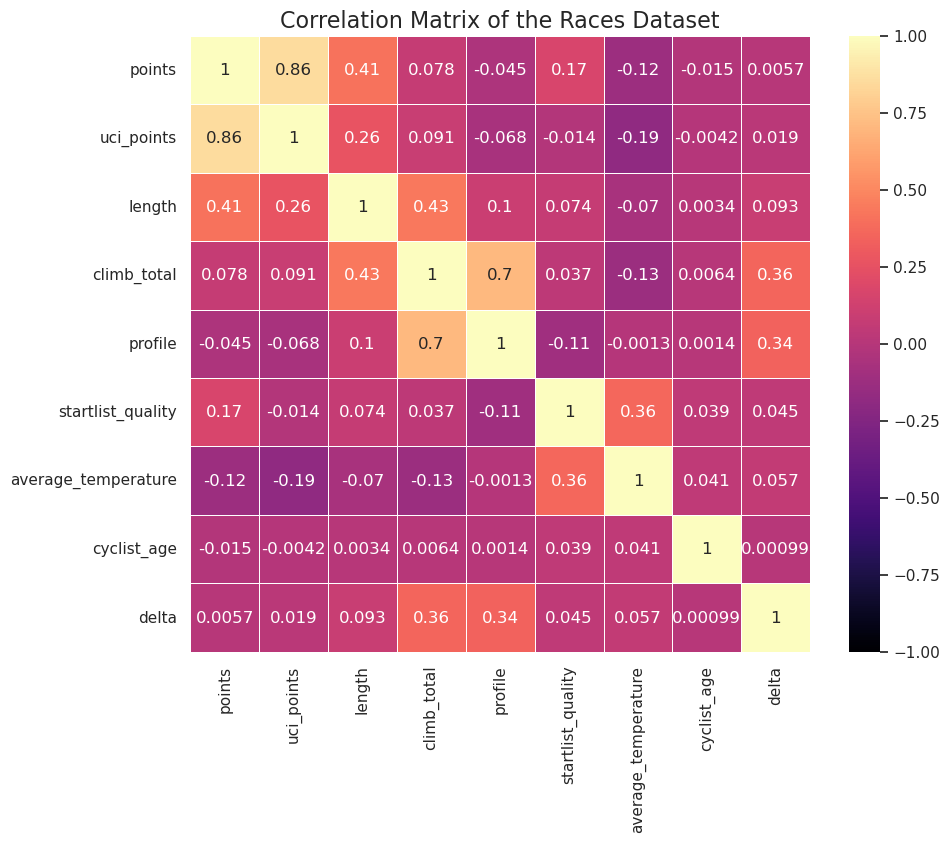

In [28]:
races_correlations = races[["points","uci_points", "length", "climb_total", "profile", "startlist_quality", "average_temperature", "cyclist_age", "delta"]].corr()

plt.figure(figsize=(10, 8))
seaborn.heatmap(races_correlations, annot=True, cmap='magma', vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of the Races Dataset", fontsize=16)
plt.show()
